<html>
<div style="width:100%">
  <div style="width:90%; float:left; background:white; margin:10px">
    <img style ="width:100%"src ="https://raw.githubusercontent.com/publicunpublic/QCMM_Jupyter/main/full.svg">
    <div style="margin-top:2.5%;position:absolute;background-color:#0e4be5;width:6%;height:0.3%"></div>
  </div>
  </div>

<html>
<center>
<br>
<h1 style="color:#E6610F;"> Analyze scan from  QCScan </h1>
<br><br>
</center>

## Define Variables


In [23]:
import qcportal as ptl

In [29]:
client_address = "152.74.10.245:7778"
username = None
password = None
scan_collection_name = "salen-OMe_d-lac_i2_03_pbe0_def2-svp_36_48"
model_chem = "PBE0-D3BJ/def2-tzvp-Psi4"

In [30]:
client = ptl.FractalClient(address=client_address, verify=False)

##  A) List structures in the scan collection

In [31]:
ds  = client.get_collection("Dataset", scan_collection_name)
ds.get_entries()

,name,molecule_id
0,1.98,45025
1,2.16,45005
2,2.1,45011
3,2.02,45020
4,1.92,45032
5,2.22,44999
6,2.14,45007
7,1.94,45030
8,2.2,45001
9,1.86,45040


##  B) Compute a different level of theory if necessary 

In [32]:
#c = ds.compute(method = 'pbe0-d3bj', basis = 'def2-tzvp', program = 'psi4', tag='energies')
#print(c)

In [33]:
#for i in c.dict()['ids']:
#     restart = client.modify_tasks("restart", base_result = i)
    #restart = client.modify_tasks("modify", new_tag = 'energies', base_result = i)
#
#
#     print(restart)

##  C)  Check the energies of the optimized points

In [34]:
import warnings
warnings.filterwarnings("ignore")

ds.get_values(program='psi4')

,PBE0/def2-tzvp-Psi4,PBE0-D3BJ/def2-tzvp-Psi4
1.98,-1110032.488901,-1110081.987727
2.16,-1110033.033183,-1110082.654687
2.1,-1110032.783107,-1110082.402647
2.02,-1110032.536059,-1110082.119128
1.92,-1110032.435519,-1110081.830668
2.22,-1110033.255425,-1110082.853403
2.14,-1110032.95435,-1110082.576864
1.94,-1110032.421502,-1110081.833474
2.2,-1110033.187308,-1110082.796218
1.86,NaN,NaN


## D)  Plot the scan energy profile 

<IPython.core.display.Javascript object>


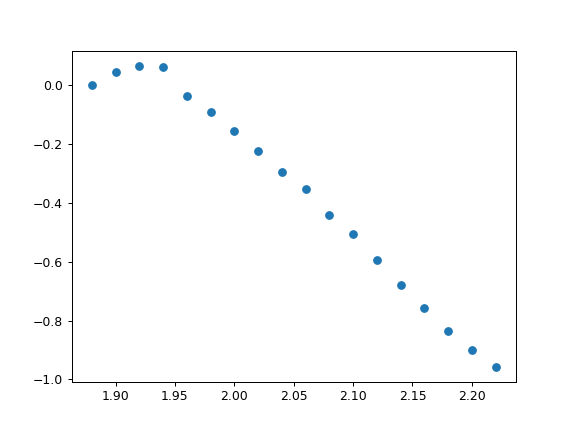

In [35]:
import matplotlib.pyplot as plt
%matplotlib notebook


model_chem = model_chem

scan_df = ds.df
scan_df = scan_df[scan_df[model_chem].notnull()]

init_energy = scan_df[model_chem].sort_index().iloc[0]
scan_df['rel_scan_energy'] = scan_df[model_chem] - init_energy
energy = scan_df['rel_scan_energy']
rx_coord =  [float(x) for x in scan_df.index]

plt.scatter(rx_coord, energy)

## E) Save the scan profile in a molden file to visualize 

The file will appear in the folder where you run this notebook with name of the collection followed by 
an `_anim.dat` apendix

In [20]:
opt_mol_id = ds.get_entries().molecule_id
opt_mol = client.query_molecules(list(opt_mol_id))

xyz_str = ''
for m in opt_mol:
    xyz_str += m.to_string("xyz")

filename = ds.name+'_anim.dat'
with open(filename, 'w') as handle:
    handle.write(xyz_str)

## D) Visualize Molecule

In [9]:
mol = client.query_molecules(44962)[0]
mol

NGLWidget()

In [12]:
mol = client.query_molecules(39831)[0]
mol

NGLWidget()

In [13]:
mol = client.query_molecules(39801)[0]
mol

NGLWidget()